# Plastic Cracking
Polymers like polypropylene can be degraded at significantly lower temperature when employing a catlyst. 
The process can be effectively studied using TGA. In this example, we use Zeolite Y to degrade polypropylene. 

In [1]:
import os
import pyTGA as tga
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The experiment is devided into multiple stages. The sample is first dried, then the polymer is cracked under nitrogen, followed by combustion of the coke formed on the catalyst under oxygen atmosphere. Below you can see the Temperature and weight over the course of the whole experiment.

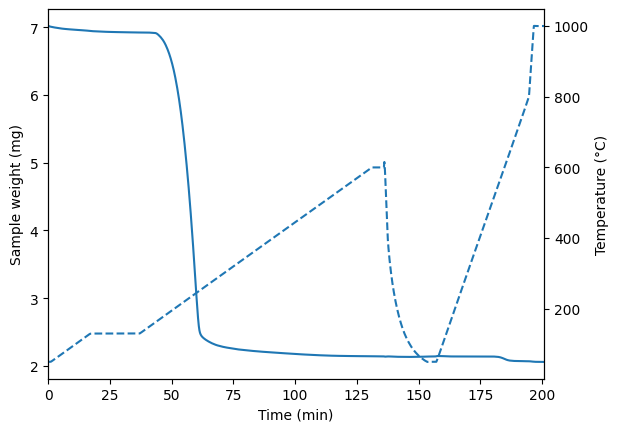

In [2]:
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'example_data'))
tga_exp = tga.parse_TGA(data_dir+'/plastic_cracking_example.txt',exp_type='pyro',calculate_DTGA=True)
tga_exp.cracking_stage_name = 'stage4'
tga_exp.burnoff_stage_name = 'stage8'
tga_exp.quickplot()

As introduced in the quickstart notebook, the pyrolysis subclass contains multiple usefull method to quickly get the most important resutls from this experiment, like the temperature of fastest decompostion rate (Tmax), the precise weight of the catalyst used, and how much of the polymer was converted to coke i.e. the coke yield.

In [3]:
results = np.array([tga_exp.m_cat(),tga_exp.m_poly(),tga_exp.coke_yield()])
np.round(results,3,results)
print('Catalyst weight', results[0], 'mg')
print('Polymer weight', results[1], 'mg')
print('Coke yield', results[2]*100, '%')

Catalyst weight 2.067 mg
Polymer weight 4.858 mg
Coke yield 1.5 %


Lets plot the cracking and burnoff parts side by side with calculated derivatives and determine the Tmax of both stages.

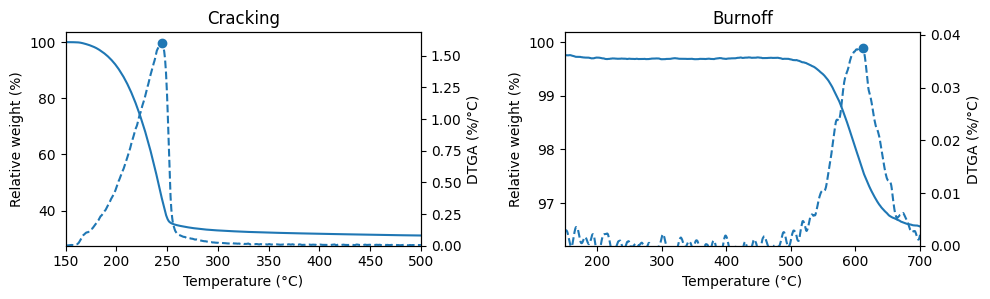

Tmax cracking 245.0 °C
Tmax coke burnoff 611.05 °C


In [ ]:
#calculating derivatives
tga_exp = tga.calc_DTGA_stage(tga_exp,'cracking',x='Temp',y='relative')
tga_exp = tga.calc_DTGA_stage(tga_exp,'burnoff',x='Temp',y='relative')

fig, ax = plt.subplots(1, 2, figsize=(5*2, 5/1.618))
ax[0].set_title('Cracking')
ax[1].set_title('Burnoff')
ax2_1 = ax[0].twinx()
ax2_2 = ax[1].twinx()

#cracking
ax[0].plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['rel_weight_twl']*100, label='Cracking')
ax2_1.plot(tga_exp.cracking()['Sample Temp.'], tga_exp.cracking()['DTGA_twl']*100, label='DTGA', linestyle='--')
ax2_1.plot(tga.calc_Tmax_exp(tga_exp, 'cracking'), tga_exp.cracking()['DTGA_twl'].max()*100,'o' ,label='Tmax', color='C0')

ax[0].set_xlim(150,500)
ax[0].set_xlabel('Temperature (°C)')
ax[0].set_ylabel('Relative weight (%)')
ax2_1.set_ylim(0,)
ax2_1.set_ylabel('DTGA (%/°C)')

#burnoff
ax[1].plot(tga_exp.burnoff()['Sample Temp.'], tga_exp.burnoff()['rel_weight_twl']*100, label='Burnoff')
ax2_2.plot(tga_exp.burnoff()['Sample Temp.'], tga_exp.burnoff()['DTGA_twl']*100, label='DTGA', linestyle='--')
ax2_2.plot(tga.calc_Tmax_exp(tga_exp, 'burnoff'), tga_exp.burnoff()['DTGA_twl'].max()*100,'o' ,label='Tmax', color='C0')

ax[1].set_xlabel('Temperature (°C)')
ax[1].set_ylabel('Relative weight (%)')
ax2_2.set_xlim(150,700)
ax2_2.set_ylim(0,)
ax2_2.set_ylabel('DTGA (%/°C)')

plt.tight_layout()
plt.show()

print('Tmax cracking', tga.calc_Tmax_exp(tga_exp, 'cracking'), '°C')
print('Tmax coke burnoff', tga.calc_Tmax_exp(tga_exp, 'burnoff'), '°C')